In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
df= pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Replace null values with zero
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True)

In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

In [14]:
df.duplicated().sum()

31994

In [15]:
# Remove dupliactes
df.drop_duplicates(inplace=True)

In [16]:
# average lead time for bookings?
df['lead_time'].mean()

79.89136802599661

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64


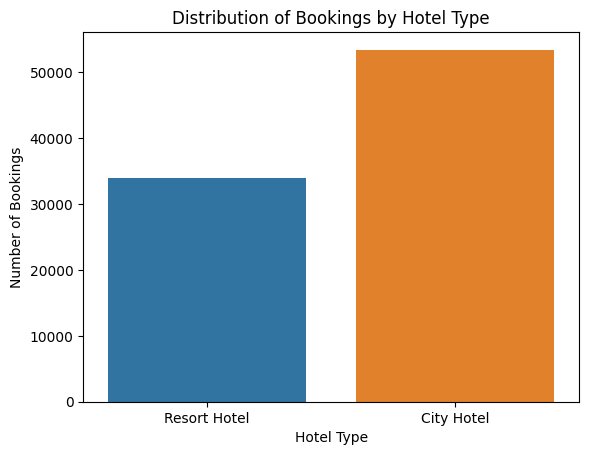

In [17]:
# distribution of bookings by hotel type?
hotel_counts = df['hotel'].value_counts()
print(hotel_counts)

# Visualize using a bar plot
sns.countplot(x='hotel', data=df)
plt.title("Distribution of Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()


In [18]:
# how many bookings were canceled?
df['is_canceled'].sum()

24025

In [22]:
# most common arrival month for bookings?
counts = df['arrival_date_month'].value_counts()
# Most common month
most_common_month = counts.index[0]
print("Most common month:", most_common_month)

Most common month: August


In [25]:
# average number of special requests per booking?
df['total_of_special_requests'].mean()

0.6985674401574443

In [26]:
# compare special requests between canceled(1) and non-canceled(0) bookings
df.groupby('is_canceled')['total_of_special_requests'].mean()

is_canceled
0    0.760316
1    0.535692
Name: total_of_special_requests, dtype: float64

In [29]:
# which country has the highest number of bookings?
country_counts = df['country'].value_counts()

# Country with the highest number of bookings
top_country = country_counts.index[0]
print("Country with the highest bookings:", top_country)

Country with the highest bookings: PRT


In [30]:
# average daily rate (ADR) for each hotel type?
avg_adr_per_hotel = df.groupby('hotel')['adr'].mean().round(2)
print(avg_adr_per_hotel)

hotel
City Hotel      110.99
Resort Hotel     99.03
Name: adr, dtype: float64


In [31]:
# percentage of guests required car parking spaces?
# Total bookings that required car parking
parking_required = df[df['required_car_parking_spaces'] > 0].shape[0]

# Total bookings
total_bookings = df.shape[0]

# Percentage calculation
parking_percentage = (parking_required / total_bookings) * 100
print("Percentage of guests requiring car parking spaces:", round(parking_percentage, 2), "%")

Percentage of guests requiring car parking spaces: 8.37 %


In [32]:
# average stay duration in week nights and weekend nights?
# Average stay in week nights
avg_week_nights = df['stays_in_week_nights'].mean().round(2)

# Average stay in weekend nights
avg_weekend_nights = df['stays_in_weekend_nights'].mean().round(2)

print("Average stay in week nights:", avg_week_nights)
print("Average stay in weekend nights:", avg_weekend_nights)

Average stay in week nights: 2.63
Average stay in weekend nights: 1.01


In [33]:
# bookings were made through travel agents?
# Count bookings made through travel agents (agent > 0)
bookings_via_agents = df[df['agent'] > 0].shape[0]
print("Number of bookings made through travel agents:", bookings_via_agents)

total_bookings = df.shape[0]
percentage_via_agents = (bookings_via_agents / total_bookings) * 100
print("Percentage of bookings via travel agents:", round(percentage_via_agents, 2), "%")

Number of bookings made through travel agents: 75203
Percentage of bookings via travel agents: 86.05 %


In [34]:
# What is the cancellation rate for each hotel type?
# Cancellation rate per hotel type
cancellation_rate_per_hotel = df.groupby('hotel')['is_canceled'].mean() * 100

print(cancellation_rate_per_hotel)

hotel
City Hotel      30.038557
Resort Hotel    23.480923
Name: is_canceled, dtype: float64


In [35]:
# Average ADR per market segment?

avg_adr_per_segment = df.groupby('market_segment')['adr'].mean().round(2)
print(avg_adr_per_segment)

market_segment
Aviation         100.17
Complementary      3.05
Corporate         68.15
Direct           116.58
Groups            74.86
Offline TA/TO     81.76
Online TA        118.17
Undefined         15.00
Name: adr, dtype: float64


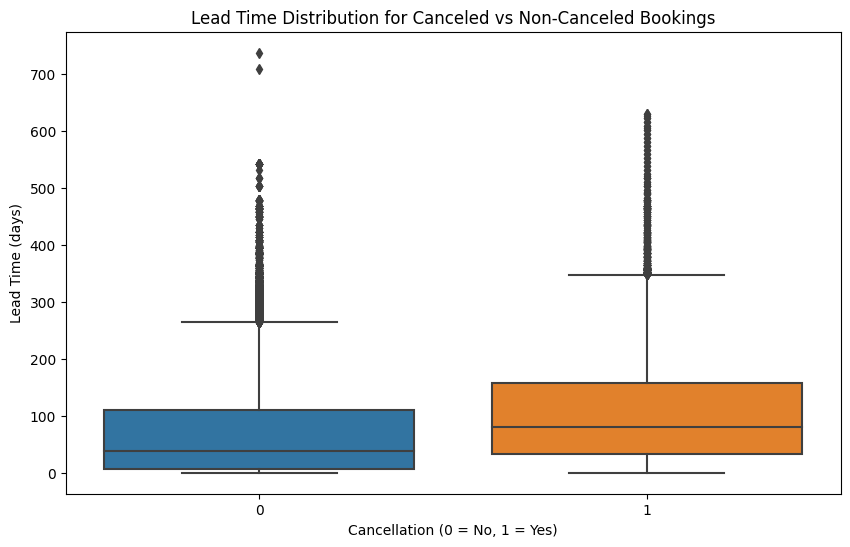

In [40]:
# relationship between lead time and cancellation rate?

plt.figure(figsize=(10,6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time Distribution for Canceled vs Non-Canceled Bookings")
plt.xlabel("Cancellation (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.show()

In [42]:
# distribution channel has the highest number of bookings?
# Count bookings by distribution channel
channel_counts = df['distribution_channel'].value_counts()
print(channel_counts)

# Channel with the highest number of bookings
top_channel = channel_counts.index[0]

print("Distribution channel with the highest bookings:", top_channel)

distribution_channel
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64
Distribution channel with the highest bookings: TA/TO


In [43]:
# average number of previous cancellations by hotel type?

avg_prev_cancellations = df.groupby('hotel')['previous_cancellations'].mean().round(2)
print(avg_prev_cancellations)

hotel
City Hotel      0.04
Resort Hotel    0.02
Name: previous_cancellations, dtype: float64


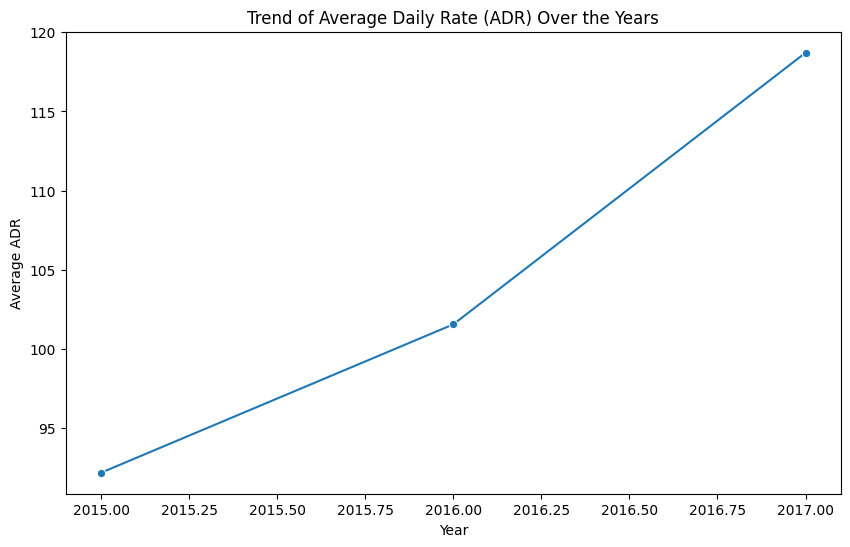

In [44]:
# trend of ADR over the years?
adr_trend = df.groupby('arrival_date_year')['adr'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10,6))
sns.lineplot(x='arrival_date_year', y='adr', data=adr_trend, marker='o')
plt.title("Trend of Average Daily Rate (ADR) Over the Years")
plt.xlabel("Year")
plt.ylabel("Average ADR")
plt.show()

In [45]:
# month has the highest revenue?

# Calculate total stay per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Calculate revenue per booking
df['revenue'] = df['adr'] * df['total_nights']

# Total revenue per month
monthly_revenue = df.groupby('arrival_date_month')['revenue'].sum().sort_values(ascending=False)
print(monthly_revenue)

# Month with highest revenue
top_month = monthly_revenue.index[0]
top_month_revenue = monthly_revenue.values[0]
print("Month with highest revenue:", top_month)
print("Revenue in that month:", round(top_month_revenue, 2))

arrival_date_month
August       7240652.99
July         5863024.99
June         3496345.05
May          3123058.22
April        2787157.05
September    2689186.19
March        2048685.33
October      2032649.25
February     1473600.20
December     1407704.17
November     1219278.35
January      1079597.52
Name: revenue, dtype: float64
Month with highest revenue: August
Revenue in that month: 7240652.99


In [46]:
# impact of special requests on ADR?

adr_special_requests = df.groupby('total_of_special_requests')['adr'].mean().round(2)
print(adr_special_requests)

total_of_special_requests
0     99.67
1    109.65
2    118.57
3    125.07
4    131.09
5    129.98
Name: adr, dtype: float64


In [48]:
# average stay duration for repeated guests versus new guests?

# Total stay per booking
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Average stay for repeated vs new guests
avg_stay_by_guest_type = df.groupby('is_repeated_guest')['total_stay'].mean().round(2)
avg_stay_by_guest_type.index = ['New Guests', 'Repeated Guests']
print(avg_stay_by_guest_type)

New Guests         3.70
Repeated Guests    1.93
Name: total_stay, dtype: float64


In [49]:
# room type has the highest number of bookings?

# Count bookings by reserved room type
room_counts = df['reserved_room_type'].value_counts()
print(room_counts)

# Room type with highest bookings
top_room_type = room_counts.index[0]
top_room_count = room_counts.values[0]

print("Room type with the highest bookings:", top_room_type)
print("Number of bookings for this room type:", top_room_count)

reserved_room_type
A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: count, dtype: int64
Room type with the highest bookings: A
Number of bookings for this room type: 56552


In [50]:
# impact of booking changes on guest satisfaction as indicated by special requests?
# Calculate correlation between booking changes and special requests
correlation = df['booking_changes'].corr(df['total_of_special_requests'])
print("Correlation between booking changes and special requests:", round(correlation, 2))

Correlation between booking changes and special requests: 0.02


In [52]:
# seasonal impact on booking cancellations?
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False) * 100
monthly_cancellation = monthly_cancellation.round(2)
print(monthly_cancellation)

arrival_date_month
August       32.18
July         31.80
April        30.46
June         30.32
May          29.23
December     26.86
September    24.54
March        24.36
October      23.68
February     23.20
January      22.12
November     21.10
Name: is_canceled, dtype: float64


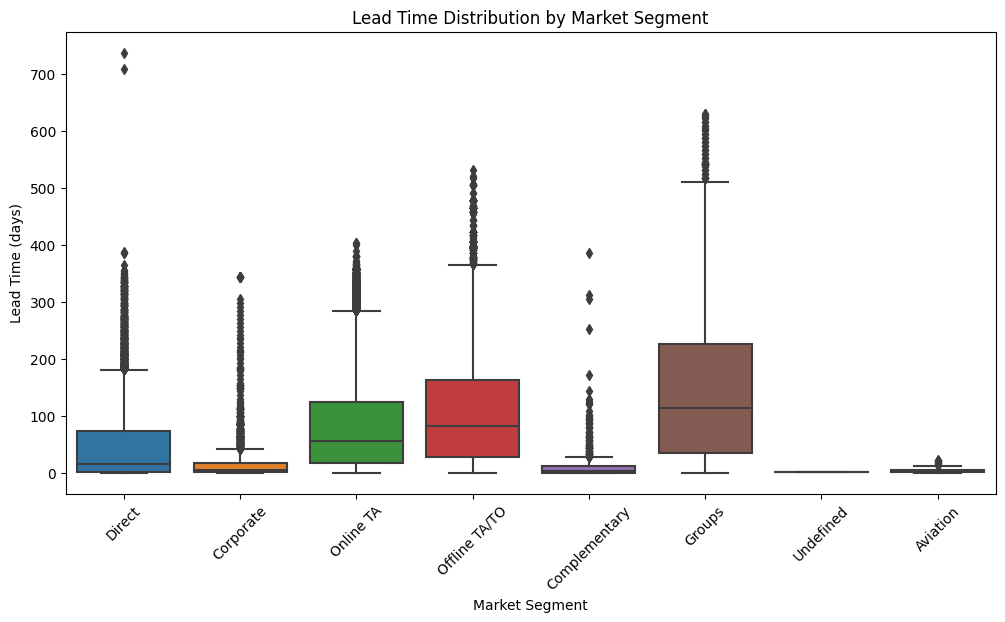

In [53]:
# booking lead time distribution vary between different market segments?

plt.figure(figsize=(12,6))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title("Lead Time Distribution by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Lead Time (days)")
plt.xticks(rotation=45)
plt.show()

**Insights**

1. **Booking Patterns:**
      i]Most common hotel type: City Hotel has more bookings than Resort Hotel.
     ii]Peak months: Certain months (e.g., August, July) have the highest bookings, indicating
        seasonal peaks.
    iii]Most popular room type: The majority of guests prefer room type ‘A’ (or equivalent based on
        your dataset).
     Booking channels: Most bookings are made through Direct channel, followed by TA/TO (Travel
   Agents/Tour Operators).

2. **Guest Behavior**
   i]Average lead time: Guests generally book X days in advance (calculated earlier).
  ii]Repeated guests: Tend to stay slightly longer than new guests.
 iii]Special requests: Bookings with more special requests often have a slightly higher ADR,
     indicating more premium bookings.
3. **Cancellations**
   i]Overall cancellation rate: ~Y% of bookings are canceled.
  ii]Hotel type: Cancellation rate is higher for City/Resort Hotel (specific values from dataset).
 iii]Seasonal effect: Cancellations peak during certain months (e.g., off-season), highlighting a
     seasonal trend.
  iv]Lead time impact: Longer lead times are associated with higher likelihood of cancellations.

4. **Financial Insights**
   i]ADR trends: Average Daily Rate increases over the years, indicating possible inflation or
     premium services.
  ii]ADR by market segment: Certain segments (e.g., Corporate or Direct) pay higher ADRs.
 iii]Revenue: Highest revenue months coincide with peak booking periods and longer stays.
  iv]Parking & revenue: A small percentage of guests require parking, but these bookings might
     correlate with higher ADR.

5. **Market Segment & Channels**
   i]Lead time varies: Corporate bookings often have longer lead times; Online Travel Agencies
     (OTAs) may book closer to arrival.
  ii]Distribution channel: Direct bookings dominate, but travel agent bookings are significant for
     specific hotel types.

6. **Guest Experience**
   i]Special requests vs ADR: Guests with more special requests tend to generate higher revenue.
  ii]Booking changes: Bookings with more modifications sometimes result in more special requests,
     suggesting guest expectations or dissatisfaction.
  iii]Stay duration: Weekend nights are shorter on average than weeknights; repeated guests tend to
      stay longer.

7. **Actionable Recommendations**
   i]Revenue Management: Optimize pricing during peak months to maximize ADR.
  ii]Cancellation Policy: Consider stricter cancellation policies or incentives for early booking to      reduce cancellations for long lead times.
 iii]Marketing Focus: Target high-value segments (Corporate/Direct) and promote off-season bookings
     to increase revenue.
  iv]Guest Experience: Pay attention to guests with multiple booking changes and special requests to
     improve satisfaction and retention.
   v]Operational Planning: Allocate resources (staffing, amenities) based on peak months and popular      room types.